In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from warnings import simplefilter
simplefilter('ignore')

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [126]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [127]:
df
reg=linear_model.LinearRegression()
temp=df[['Ground Temperature']]
chirp=df['Chirps/Second']
reg.fit(temp,chirp)
slope='{:.4f}'.format(reg.coef_[0])
intercept='{:.4f}'.format(reg.intercept_)
print(f'linear regression : y = {slope} * x + {intercept}')


linear regression : y = 0.2030 * x + 0.4593


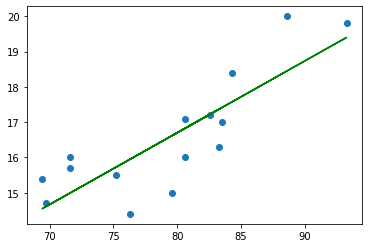

In [128]:
plt.scatter(temp,chirp)
pred_temp=reg.predict(temp)
plt.plot(temp,pred_temp,color='g')
plt.show()

In [129]:
r2='{:.4f}'.format(reg.score(temp,chirp))
print(f'R2 score : {r2}')

R2 score : 0.6923


In [130]:
chirps=reg.predict([[95]])[0]
print('if ground temp is 95˚ then approx rate of chirping :{:.4f}'.format(chirps))

if ground temp is 95˚ then approx rate of chirping :19.7443


In [131]:
ground_temp='{:.1f}'.format(( 18 - reg.intercept_) / reg.coef_[0])
print('crickets chirping rate of 18 chirps/sec so approx ground temp :'+str(ground_temp))

crickets chirping rate of 18 chirps/sec so approx ground temp :86.4


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [132]:
df1 = pd.read_fwf("/content/drive/MyDrive/Task6/assignment_5_6_7/brain_body.txt")
reg_brbd=linear_model.LinearRegression()
body_wt=df1[['Body']]
brain_wt=df1['Brain']
reg_brbd.fit(body_wt,brain_wt)
brbd_slope='{:.4f}'.format(reg_brbd.coef_[0])
brbd_intercept='{:.4f}'.format(reg_brbd.intercept_)
print(f'Linear Regression Equation : y = {brbd_slope} * x + ({brbd_intercept}) ')

Linear Regression Equation : y = 0.9029 * x + (-56.8555) 


In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


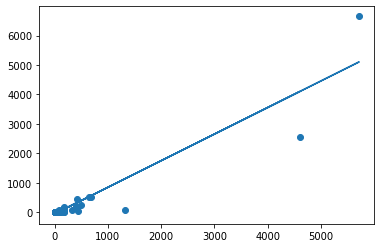

In [134]:
ax=plt.scatter(body_wt,brain_wt)
pred_body=reg_brbd.predict(body_wt)
ax=plt.plot(body_wt,pred_body)
plt.show()

In [135]:
bdbr_R2=reg_brbd.score(body_wt,brain_wt)
print(f"R2 Score : {bdbr_R2}")
print("The equation is fit for this data because it has a strong correlation.")

R2 Score : 0.8726620843043331
The equation is fit for this data because it has a strong correlation.


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

Task 1:

In [136]:
df2 = pd.read_fwf("/content/drive/MyDrive/Task6/assignment_5_6_7/salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
independent=df2.iloc[:,:5]
dependent=df2['Salary']
sal_reg=linear_model.LinearRegression()
sal_reg.fit(independent,dependent)
sal_slope=sal_reg.coef_
sal_intercept=sal_reg.intercept_
print('Linear Regression Equation of columns :{} + {}'.format(sal_slope, sal_intercept) )

Linear Regression Equation of columns :[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


Task 2:


In [137]:

from itertools import combinations

col=["Sex", "Rank", "Year", "Degree", "YSdeg"]
comb=[]
for i in range(1,len(col)+1):
  for elem in list(combinations(col,i)):
    comb.append(elem)
l1=[]
l2=[]
for elem in comb[::-1]:
  independent1=df2[list(elem)]
  sal1_reg=linear_model.LinearRegression()
  sal1_reg.fit(independent1,dependent)
  sal_R2=sal1_reg.score(independent1,dependent) 
  l1.append(str(list(elem)))
  l2.append(sal_R2)

comb_list=pd.DataFrame([l1,l2])
comb_list2=comb_list.T
comb_list2.columns=['selected_columns','R2_score']
comb_list2.sort_values(by=['R2_score'],ascending=False)
val=comb_list2['R2_score'].max()
res=comb_list2[comb_list2['R2_score']==val]
result=res.values
print('selection of columns ' +result[0,0]+ ' best R2 score is ' +str(result[0,1]))

selection of columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] best R2 score is 0.8547180674410969


Task 3:

In [138]:
s_count=df2.Sex.value_counts()
m=s_count[0]
f=s_count[1]
print(f'Male   :{m}\nFemale :{f}')

Male   :38
Female :14


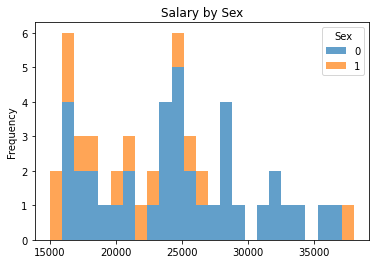

In [139]:

pv=df2.pivot_table(index=df2.index,columns='Sex',values='Salary')
pv.plot(kind='hist',alpha=0.7,bins=25,title='Salary by Sex',stacked=True)

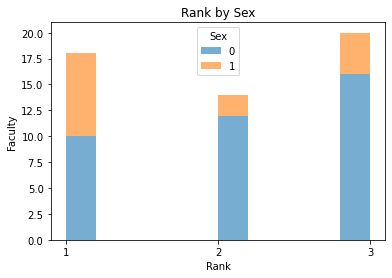

In [140]:
pv1=df2.pivot_table(index=df2.index, columns='Sex', values='Rank')
pv1.plot(kind='hist', alpha=0.6, stacked=True, title='Rank by Sex')
plt.xticks([1,2,3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

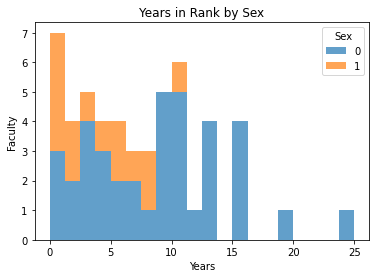

In [141]:
pv3= df2.pivot_table(index=df2.index, columns='Sex', values='Year')
pv3.plot(kind='hist', alpha=0.7, stacked=True, bins=20,title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [173]:
df2_10 = df2[df2['Year'] <= 10]
col=["Sex", "Rank", "Year", "Degree", "YSdeg"]
comb=[]
for i in range(1,len(col)+1):
  for elem in list(combinations(col,i)):
    comb.append(elem)
l1=[]
l2=[]
for elem in comb[::-1]:
  independent1=df2[list(elem)]
  independent1=df2.merge(df2_10,left_index=True,right_index=True,how='right',suffixes=('_x',''))
  independent1=independent1[list(elem)]
  sal1_reg=linear_model.LinearRegression()
  sal1_reg.fit(independent1,df2_10['Salary'])
  sal_R2=sal1_reg.score(independent1,df2_10['Salary']) 
  l1.append(str(list(elem)))
  l2.append(sal_R2)

comb_list=pd.DataFrame([l1,l2])
comb_list2=comb_list.T
comb_list2.columns=['selected_columns','R2_score']
comb_list2.sort_values(by=['R2_score'],ascending=False)
val=comb_list2['R2_score'].min()
res=comb_list2[comb_list2['R2_score']==val]
result=res.values
print("'Sex' has no direct influences on 'Salary' , Score :" +str(result[0,1]))

'Sex' has no direct influences on 'Salary' , Score :0.006877700561349731


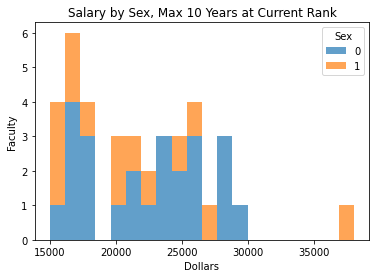

In [175]:
pv5=df2_10.pivot_table(index=df2_10.index, columns='Sex', values='Salary') 
pv5.plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

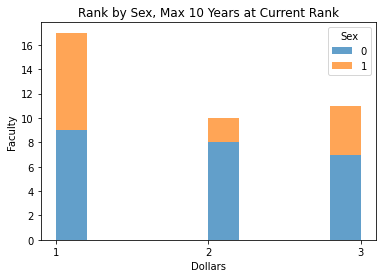


The data show that there is no direct salary discrimination by sex


In [178]:
pv6=df2_10.pivot_table(index=df2_10.index, columns='Sex', values='Rank') 
pv6.plot(kind='hist', alpha=0.7, stacked=True,title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()
print('\nThe data show that there is no direct salary discrimination by sex')

In [186]:
df2_10 = df2[df2['Year'] <= 10]
col=["Sex", "Year", "Degree", "YSdeg"]
comb=[]
for i in range(1,len(col)+1):
  for elem in list(combinations(col,i)):
    comb.append(elem)
l1=[]
l2=[]
for elem in comb[::-1]:
  independent1=df2[list(elem)]
  independent1=df2.merge(df2_10,left_index=True,right_index=True,how='right',suffixes=('_x',''))
  independent1=independent1[list(elem)]
  sal1_reg=linear_model.LinearRegression()
  sal1_reg.fit(independent1,df2_10['Rank'])
  sal_R2=sal1_reg.score(independent1,df2_10['Rank']) 
  l1.append(str(list(elem)))
  l2.append(sal_R2)

comb_list=pd.DataFrame([l1,l2])
comb_list2=comb_list.T
comb_list2.columns=['selected_columns','R2_score']
comb_list2.sort_values(by=['R2_score'],ascending=False)
print(comb_list2)
val=comb_list2['R2_score'].min()
res=comb_list2[comb_list2['R2_score']==val]
result=res.values
print("\nPresent rank for 10 years or less there is no correlation with Sex. There is no salary discrimination by Sex")

                      selected_columns  R2_score
0   ['Sex', 'Year', 'Degree', 'YSdeg']  0.668478
1          ['Year', 'Degree', 'YSdeg']  0.612324
2           ['Sex', 'Degree', 'YSdeg']  0.665084
3             ['Sex', 'Year', 'YSdeg']  0.516957
4            ['Sex', 'Year', 'Degree']  0.177544
5                  ['Degree', 'YSdeg']  0.612104
6                    ['Year', 'YSdeg']  0.484873
7                   ['Year', 'Degree']  0.176131
8                     ['Sex', 'YSdeg']  0.516918
9                    ['Sex', 'Degree']  0.016345
10                     ['Sex', 'Year']  0.176416
11                           ['YSdeg']  0.482576
12                          ['Degree']  0.003604
13                            ['Year']  0.175024
14                             ['Sex']  0.013387

Present rank for 10 years or less there is no correlation with Sex. There is no salary discrimination by Sex
